In [1]:
import pandas as pd

- Reading data from file

In [2]:
df = pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\spam.csv")

- So Here we have to column which include input and our output

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df['Category'].replace({"ham" : 0, "spam": 1}, inplace = True)

In [6]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- Converting all messages into string format

In [7]:
df['Message'] = [str(x) for x in df['Message']]

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Separting as input and output

In [9]:
X = df['Message']
y = df['Category']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
X_train.head()

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
Name: Message, dtype: object

In [13]:
X_train.shape

(4457,)

In [14]:
X_test.shape

(1115,)

- Below applying countervectorizer to convert all dataset into vector format

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer()

In [17]:
X_train_vect = vectorizer.fit_transform(X_train)

In [18]:
X_train_vect

<4457x7701 sparse matrix of type '<class 'numpy.int64'>'
	with 59275 stored elements in Compressed Sparse Row format>

- I have to convert it into array

In [19]:
X_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
X_train_vect.toarray().shape

(4457, 7701)

- Applying Bernoullis naive bayes algorithms

In [21]:
from sklearn.naive_bayes import BernoulliNB

In [22]:
model = BernoulliNB()

In [23]:
model.fit(X_train_vect, y_train)

BernoulliNB()

In [24]:
X_test_vect = vectorizer.transform(X_test)

In [25]:
X_test_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
model.score(X_test_vect, y_test)

0.9802690582959641

- Now we check if pass new email so what our model predict

In [27]:
emails = ['Hey John, can we get together to watch football game tomorrow?',
         'Upto 20% discount on parking, exclusive offer just for you. Dont miss this chance',
         'Get a FREE hoodie by calling 8845545 t&c apply'
]

- Suppose i have to predict some random email data so for that we pass it to the vectorizer

In [28]:
email_vect = vectorizer.transform(emails)

In [29]:
model.predict(email_vect)

array([0, 0, 0], dtype=int64)

- As above we get wrong prediction so we apply another type of naive bayes

- Now applying different naive bayes algorithm that is Multinomial

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
mb = MultinomialNB()

In [32]:
mb.fit(X_train_vect, y_train)

MultinomialNB()

In [33]:
mb.predict(email_vect)

array([0, 1, 1], dtype=int64)

- Here multinomial perform right

In [34]:
mb.score(X_test_vect, y_test)

0.9919282511210762

- For squential operation we apply here Pipeline method

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
clf = Pipeline([('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [37]:
clf

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

- Now we train our model

In [38]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [39]:
clf.score(X_test, y_test)

0.9919282511210762

In [40]:
clf.predict(emails)

array([0, 1, 1], dtype=int64)

- Now will plot confusion matrix

In [41]:
y_pred = clf.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

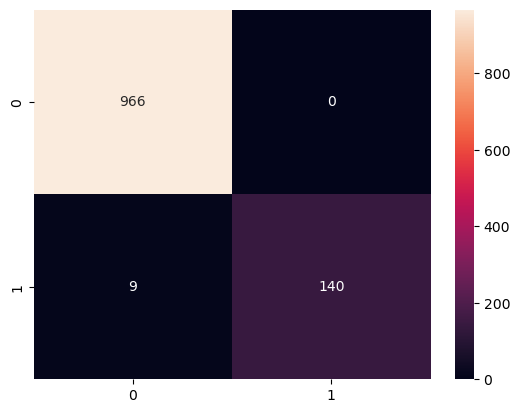

In [44]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt = 'd')